In [73]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [74]:
# load data

df = pd.read_csv('aimlabs_data.csv')
df.head()


,Name,Group,Music,score,acc,kps,trgkill,rxtime,tottrg,totshot
0,Ayush Yadav,1 (No Music),NaN,"54552, 57656, 52285, 57899, 62958, 57746","90.2, 87.7, 75.5, 83.3, 95.6, 90.4","1.6, 1.8, 1.8, 1.8, 1.8, 1.7","101, 107, 108, 110, 109, 104","586, 552, 547, 533, 541, 567","102, 108, 110, 112, 110, 106","112, 122, 143, 132, 114, 115"
1,Jai Bhatnagar,2 (EM high tempo),Crystal Kid 3 by Tomas Skyldeberg,"50629, 53306, 51638, 54642, 50624, 49127","93.8, 93.2, 93.1, 96.0, 91.2, 93.8","1.5, 1.6, 1.6, 1.6, 1.5, 1.5","91, 96, 95, 97, 93, 91","637, 614, 623, 608, 621, 653","94, 98, 96, 98, 96, 92","97, 103, 102, 101, 102, 97"
2,Ashmit Chamoli,3 (EM low tempo),The Last Fox - Penumbra,"39248, 47609, 44418, 49858, 45135, 46923","85.9, 84.5, 80.9, 87.2, 77.3, 78.0","1.3, 1.6, 1.4, 1.6, 1.6, 1.6","79, 93, 89, 95, 92, 96","736, 629, 651, 615, 609, 600","82, 96, 92, 98, 98, 100","92, 110, 110, 109, 119, 123"
3,Rushil Kaul,4 (Classical high tempo),"Concerto Grosso for Strings ""Palladio"": I. All...","34243, 35631, 37459, 41595, 45874, 45082","87.3, 83.9, 87.2, 91.9, 95.5, 94.4","1.1, 1.2, 1.3, 1.4, 1.4, 1.4","69, 73, 75, 79, 84, 84","796, 735, 745, 728, 693, 701","76, 82, 80, 82, 86, 86","79, 87, 86, 86, 88, 89"
4,Aarnav Nagariya,5 (Classical low tempo),"J.S. Bach: Orchestral Suite No. 3 in D Major, ...","33760, 46727, 47115, 46647, 45132, 51968","77.9, 89.1, 84.4, 87.5, 84.8, 91.4","1.3, 1.5, 1.5, 1.5, 1.5, 1.6","74, 90, 92, 91, 89, 96","737, 663, 634, 637, 648, 617","82, 90, 94, 94, 92, 98","95, 101, 109, 104, 105, 105"


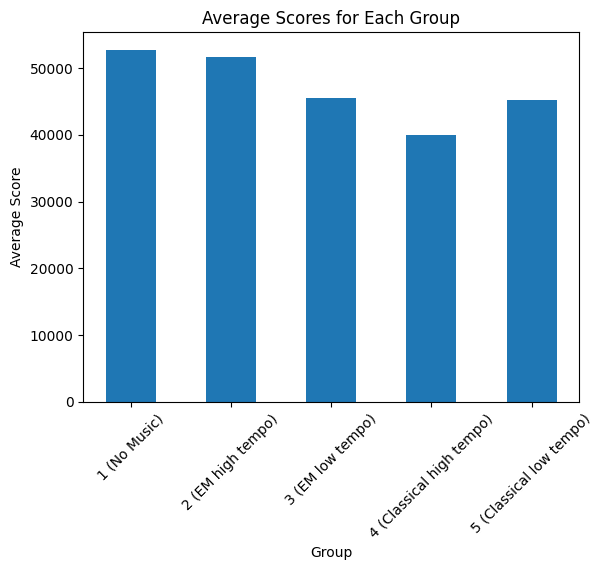

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('aimlabs_data.csv')

# Convert the 'score' column to a list of integers
df['score'] = df['score'].apply(lambda x: list(map(int, x.split(','))))

# Calculate the average score for each group
df['avg_score'] = df['score'].apply(lambda x: sum(x)/len(x))
group_avg_scores = df.groupby('Group')['avg_score'].mean()


# Plot the bar graph with rotated x-axis labels
plt.bar(group_avg_scores.index, group_avg_scores.values, width=0.5)
plt.xlabel('Group')
plt.ylabel('Average Score')
plt.title('Average Scores for Each Group')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()




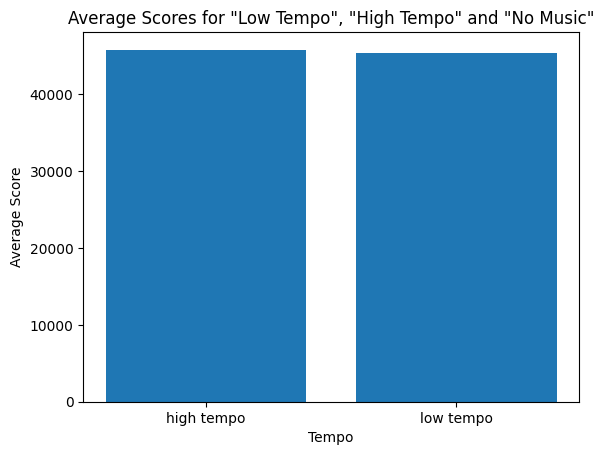

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('aimlabs_data.csv')

# Convert the 'score' column to a list of integers
df['score'] = df['score'].apply(lambda x: [int(i) for i in x.split(',')])

# Calculate the average score for each group
df['avg_score'] = df['score'].apply(lambda x: sum(x)/len(x))

# Create a new column 'Tempo' with 'low tempo', 'high tempo' and 'no music' based on 'Group'
df['Tempo'] = df['Group'].apply(lambda x: 'low tempo' if 'low tempo' in x else ('high tempo' if 'high tempo' in x else ('no music' if 'no music' in x else 'other')))

# Filter the DataFrame for 'low tempo', 'high tempo' and 'no music'
filtered_df = df[df['Tempo'].isin(['low tempo', 'high tempo', 'no music'])]

# Calculate the average score for each tempo
tempo_avg_scores = filtered_df.groupby('Tempo')['avg_score'].mean()

# Plot the bar graph
plt.bar(tempo_avg_scores.index, tempo_avg_scores.values)
plt.xlabel('Tempo')
plt.ylabel('Average Score')
plt.title('Average Scores for "Low Tempo", "High Tempo" and "No Music"')
plt.show()
